In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import center_of_mass from skimage.measure
from scipy.ndimage import center_of_mass

In [2]:
frame1 = np.load("/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/Simulated_V2.1/Frames/patient001_frame12_slice_5_ACDC_#0_1.npy")
frame2 = np.load("/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/Simulated_V2.1/Frames/patient001_frame12_slice_5_ACDC_#0_2.npy")
x = np.load("/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/Simulated_V2.1/Displacements/patient001_frame12_slice_5_ACDC_#0_x.npy")
y = np.load("/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/Simulated_V2.1/Displacements/patient001_frame12_slice_5_ACDC_#0_y.npy")

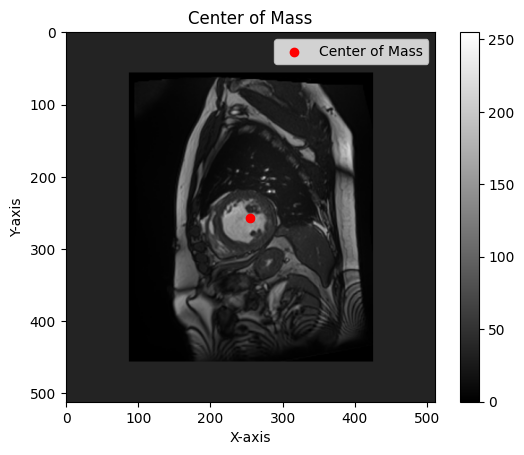

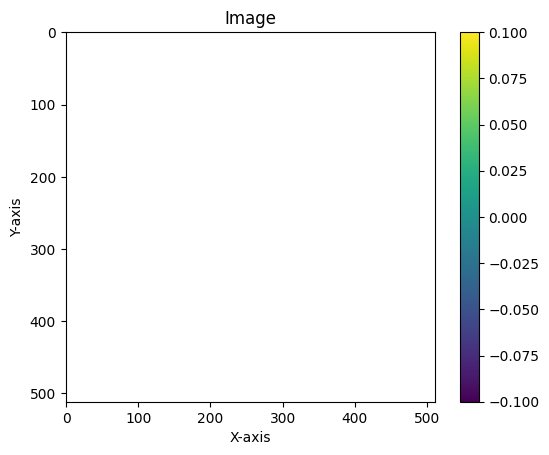

In [9]:
image = np.load("/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/Simulated_V2.1/Displacements/patient031_frame10_slice_0_ACDC_#0_x.npy")
plt.imshow(image)
plt.colorbar()
plt.title('Image')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [11]:
import os

In [20]:
frames = "/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/Simulated_V2.1/Displacements"
framess = os.listdir(frames)
for frame in framess:
    if frame == ".DS_Store":
        continue
    frame_name = frame
    frame = np.load(os.path.join(frames, frame), allow_pickle=True)
    # print(frame_name)
    # print(frame.shape)
    if frame.shape[0] == 128:
        print(frame_name)

In [ ]:
for 

In [27]:
frames = "/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/Simulated_V2.1/Frames"
framess = os.listdir(frames)
for frame in framess:
    if frame == ".DS_Store":
        continue
    framename = frame
    frame = np.load(os.path.join(frames, framename), allow_pickle=True)
    print(frame.shape)
    # # if frame.shape  == (128, 128):
    # #     print(frame.shape)
    # #     print(frame_name)
    # #     # delete this frame

        
    # frame = frame[:,:,0]
    # # # # save
    # np.save(os.path.join(frames, framename), frame)

(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)